In [320]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [321]:
df=pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [322]:
#clear NaN ages
df = df[df['Age'].notna()]
df = df.reset_index(drop=True)

In [323]:
 df.loc[(df['Fare']<5) & (df['Pclass']<3)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
212,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
643,807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0,A36,S
658,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0,NaN,S


In [324]:
#set the missing fair of pclasses
mean_fare_1=df['Fare'].loc[df['Pclass']==1].mean()
df.loc[(df.loc[(df['Fare']<4)&(df['Pclass']==1)]).index,'Fare']=mean_fare_3
mean_fare_2=df['Fare'].loc[df['Pclass']==2].mean()
df.loc[(df.loc[(df['Fare']<4)&(df['Pclass']==2)]).index,'Fare']=mean_fare_2
mean_fare_3=df['Fare'].loc[df['Pclass']==1].mean()
df.loc[(df.loc[(df['Fare']<4)&(df['Pclass']==3)]).index,'Fare']=mean_fare_3

In [325]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [326]:
Age=df['Age'].values
Age=Age.reshape(-1,1)
kmean=KMeans(n_clusters=5)
kmean.fit(Age)
predict=kmean.predict(Age)

df['Age_gp'] = pd.Series(predict, index=df.index)


/home/almighty/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [327]:
fares=df['Fare'].values
fares=fares.reshape(-1,1)
kmean=KMeans(n_clusters=3)
kmean.fit(fares)
predict=kmean.predict(fares)

df['Money'] = pd.Series(predict, index=df.index)


/home/almighty/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'Money')

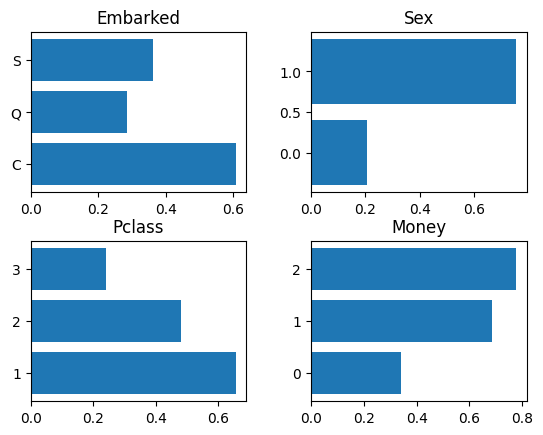

In [330]:
fig, axs = plt.subplots(2, 2)
mean_Embarked = df.groupby('Embarked')['Survived'].mean()
mean_Sex = df.groupby('Sex')['Survived'].mean()
mean_Pclass = df.groupby('Pclass')['Survived'].mean()
mean_Money = df.groupby('Money')['Survived'].mean()

fig.subplots_adjust(wspace=0.3, hspace=0.3)
# Plot each set of data on a separate subplot
axs[0, 0].barh(mean_Embarked.index, mean_Embarked.values)
axs[0, 0].set_title('Embarked')
axs[0, 1].barh(mean_Sex.index, mean_Sex.values)
axs[0, 1].set_title('Sex')
axs[1, 0].barh(mean_Pclass.index, mean_Pclass.values)
axs[1, 0].set_title('Pclass')
axs[1, 1].barh(mean_Money.index, mean_Money.values)
axs[1, 1].set_title('Money')

In [331]:
#encode embark location with one-hot-encoding
df_encoded = pd.get_dummies(df, columns=['Embarked'])
#df_encoded = pd.get_dummies(df_encoded, columns=['Age_gp'])
df_encoded=df_encoded.drop(['Name','Ticket','Age_gp','PassengerId','Cabin','Money'],axis=1)

In [334]:
scaler = MinMaxScaler()
df_encoded['Age'] = scaler.fit_transform(df_encoded[['Age']])
df_encoded['Fare'] = scaler.fit_transform(df_encoded[['Fare']])

In [335]:
y = df_encoded.iloc[:,0]
X = df_encoded.iloc[:,1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [336]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=2000, max_depth=5, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
print("\nAUC Score: ", auc)

Confusion Matrix:
 [[114  11]
 [ 27  63]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.91      0.86       125
           1       0.85      0.70      0.77        90

    accuracy                           0.82       215
   macro avg       0.83      0.81      0.81       215
weighted avg       0.83      0.82      0.82       215


AUC Score:  0.806


In [337]:
from sklearn.svm import SVC
clf = SVC(kernel='linear', C=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
print("\nAUC Score: ", auc)


Confusion Matrix:
 [[108  17]
 [ 28  62]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.86      0.83       125
           1       0.78      0.69      0.73        90

    accuracy                           0.79       215
   macro avg       0.79      0.78      0.78       215
weighted avg       0.79      0.79      0.79       215


AUC Score:  0.7764444444444445


In [338]:
logreg = LogisticRegression(max_iter=300)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
print("\nAUC Score: ", auc)

Confusion Matrix:
 [[109  16]
 [ 22  68]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       125
           1       0.81      0.76      0.78        90

    accuracy                           0.82       215
   macro avg       0.82      0.81      0.82       215
weighted avg       0.82      0.82      0.82       215


AUC Score:  0.8137777777777778


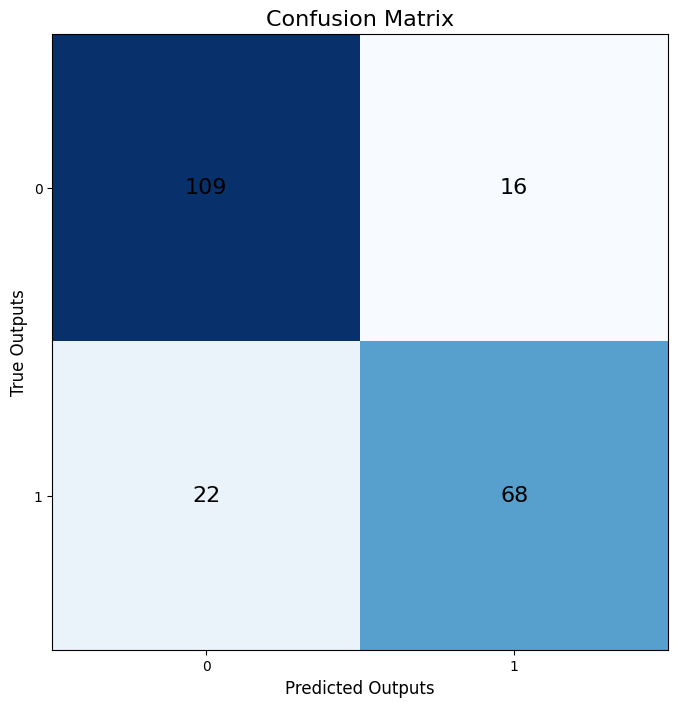

In [339]:
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix using matplotlib
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm, cmap=plt.cm.Blues)
ax.grid(False)
ax.set_xlabel('Predicted Outputs', fontsize=12, color="black")
ax.set_ylabel('True Outputs', fontsize=12, color="black")
ax.set_xticks(np.arange(2))
ax.set_yticks(np.arange(2))
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])
ax.set_ylim(len(cm)-0.5, -0.5)  # Setting the y-axis limits appropriately to match the heatmap.
plt.title("Confusion Matrix", fontsize=16, color="black")
for i in range(len(cm)):
    for j in range(len(cm)):
        ax.text(j, i, str(cm[i][j]), horizontalalignment='center', verticalalignment='center', color="black", fontsize=16)
plt.show()

clean the test data

In [347]:
df_test=pd.read_csv('test.csv')
mean_fare_1=df_test['Fare'].loc[df_test['Pclass']==1].mean()
df_test.loc[(df_test.loc[(df_test['Fare']<4)&(df_test['Pclass']==1)]).index,'Fare']=mean_fare_3
mean_fare_2=df_test['Fare'].loc[df['Pclass']==2].mean()
df_test.loc[(df_test.loc[(df_test['Fare']<4)&(df_test['Pclass']==2)]).index,'Fare']=mean_fare_2
mean_fare_3=df_test['Fare'].loc[df['Pclass']==1].mean()
df_test.loc[(df_test.loc[(df_test['Fare']<4)&(df_test['Pclass']==3)]).index,'Fare']=mean_fare_3
df_test.loc[(df_test.loc[df_test['Fare'].isna()]).index,'Fare']=mean_fare_3
#encdoe male and female
df_test['Sex'] = df_test['Sex'].map({'male': 0, 'female': 1})
#fill nan values in age and fare
age_mean = df_test['Age'].mean()
age_median = df_test['Age'].median()
df_test['Age'] = df_test['Age'].fillna(age_mean if age_mean < age_median else age_median)
#create new label,money
fares=df_test['Fare'].values
fares=fares.reshape(-1,1)
kmean=KMeans(n_clusters=3)
kmean.fit(fares)
predict=kmean.predict(fares)
df_test['Money'] = pd.Series(predict, index=df_test.index)
#create new label,age_gp
Age=df_test['Age'].values
Age=Age.reshape(-1,1)
kmean=KMeans(n_clusters=5)
kmean.fit(Age)
predict=kmean.predict(Age)
df_test['Age_gp'] = pd.Series(predict, index=df_test.index)
#one hot encoding for embark location
df_test = pd.get_dummies(df_test, columns=['Embarked'])
#drop unasble rows
df_test_final=df_test.drop(['Name','Ticket','Age_gp','PassengerId','Cabin','Money'],axis=1)
#scale
scaler = MinMaxScaler()
df_test_final['Age'] = scaler.fit_transform(df_test_final[['Age']])
df_test_final['Fare'] = scaler.fit_transform(df_test_final[['Fare']])

/home/almighty/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/almighty/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [349]:
df_test['Survived']=logreg.predict(df_test_final)
df_test_final['Survived']=logreg.predict(df_test_final)

In [352]:
answers=df_test.iloc[:,[0,-1]]
answers.to_csv('output.csv', index=False)